# Laboratorio 5: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>


### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: María Jesús Valenzuela
- Nombre de alumno 2: Matías Zúñiga

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/jesuvalenzuela/NanSquad)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.





### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

1. Los datos de entrenamiento se usan para "ajustar" el modelo, mientras que los datos de validación se utilizar para evaluar la calidad de este ajuste.

2. Los modelos de clasificación requieren, por definición, etiquetas (datos supervisados) para su entrenamiento y validación. Por lo tanto, el principal desafío sería etiquetar los datos para posibilitar el desarrollo de modelos de clasificación.

3. La matriz de confusión entrega un resumen del desempeño de un modelo de clasificación. Un eje representa las clases reales y el otro las clases predichas. Por ejemplo, si el eje X representa la clase real y el eje Y la predicha, cada "celda" (x, y) indica cuantos puntos que pertenecen realmente a la clase x fueron clasificados por el modelo en la clase y.
Esta permite visualizar, para cada clase, cuantos valores fueron clasificados correctamente y cuantos no.

4. 
$$Accuracy = (TP + TN) / (TP + TN + FP + FN)$$
Representa la cantidad de puntos correctamente clasificados, sobre el total de predicciones.

$$Precision = TP / (TP + FP)$$
De todas las predicciones positivas que hizo el modelo, cuántas fueron correctas.

$$Recall = TP / (TP + FN)$$
De todos los casos positivos, cuantos fueron predichos correctamente.

$$F1-score = 2 × (Precision × Recall) / (Precision + Recall)$$
Es un equilibrio entre precision (que castiga falsos positivos) y recall (que castiga falsos negativos).


5. 
  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera: Recall - Es importante detectar todas las fallas. Es preferible tener algunos falsos positivos (mantenimiento innecesario) que omitir una falla real.
  * Detección de enfermedades altamente contagiosas: Recall - No detectar un caso positivo generaría que el paciente no tome precauciones. Es preferible tener algunos falsos positivos (cuarentenas innecesarias) que omitir casos reales.
  * Aprobación de créditos de alto riesgo: Precision - Es mejor minimizar los falsos positivos (aprobar malos créditos), ya que es preferible rechazar algunos buenos clientes que aprobar malos pagadores.
  * Detección de crímenes: F1-score - No es deseable dejar criminales libres ni encarcelar personas inocentes, por lo que se recomienta esta métrica que balancea ambos escenarios.

6. La calibración de modelos se refiere a ajustar las probabilidades predichas por un modelo a las frecuencias observadas en la realidad. Un modelo bien calibrado puede utilizarse para gestión de riesgo o toma de decisiones, considerando las predicciones del modelo para identificar los escenarios más probables.


# Parte práctica [48 puntos]

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [102]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [156]:
# Librerías 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score

from sklearn.linear_model import SGDClassifier

#librería PyCaret
from pycaret.classification import *

from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.metrics import brier_score_loss


In [2]:
df = pd.read_csv('stats_players.csv')
df

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,34,48,15,23,14,12,13,12,24,12


## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

#### 1. Generación de labels

In [ ]:
def jugador_seleccionado(pos):
    """Retorna 1 si un jugador fue seleccionado (tiene una posición válida) y 
    0 si un jugador no fue seleccionado (su posición es Nan)."""
    if pd.isna(pos):
        return 0
    else:
        return 1

# Copia del df para no agregar la variable label al original
df_national = df.copy()

# Crear labels
df_national['label'] = df_national['National_Position'].apply(jugador_seleccionado)

# Definir X e y para modelo
X = df_national.drop(columns=['label', 'National_Position']).copy()
y = df_national['label']

#### 2. Ejemplos por clase

In [4]:
# Contar ejemplos por clase
df_national['label'].value_counts()

label
0    16513
1     1075
Name: count, dtype: int64

Hay un evidente desbalance de clases, donde la mayoría de los jugadores pertenece a la clase 0 (no seleccionado).

#### 3. Column Transformer
El siguiente transformador se basa en la información contenida en el reporte:

In [78]:
# Columnas a eliminar (alta correlación, cardinalidad)
columns_to_drop = [
    'Name', 'Nationality', # Alta cardinalidad
    'Standing_Tackle', 'Ball_Control', 'Short_Pass', 'Weight', 'Reactions'  # Alta correlación
]

# Pipelines de transformación
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

# Características numéricas
numerical_features = X.select_dtypes('number').columns.tolist()
numerical_features = [x for x in numerical_features if x not in columns_to_drop]

# Características categóricas
categorical_features = X.select_dtypes('object').columns.tolist()
categorical_features = [x for x in categorical_features if x not in columns_to_drop]

# ColumnTransformer
col_transformer = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features),
], 
remainder='drop',
verbose_feature_names_out=False)


#### 4. Justificación ColumnTransformer

Se identificó las siguientes situaciones en el reporte:
1. **Alta Correlación:** Hay muchas variables que están fuertemente correlacionadas entre sí. Por ejemplo:
   * `Sliding_Tackle` y `Standing_Tackle`.
   * `Dribbling` y `Ball_Control`.
   * `Short_Pass` y `Ball_Control`.
   * `Height` y `Weight`.
   * `Overall` (valoración general) y `Reactions`.
   
Para evitar la multicolinealidad, se eliminó una de las variables de cada par altamente correlacionado.

2. **Alta Cardinalidad:** Las columnas `Name` y `Nationality` tienen demasiados valores únicos.
Estas columnas fueron eliminadas, ya que no aportan información generalizable.

El resto de transformaciones corresponde a procedimientos estándar, como imputar y escalar en variables numericas, e imputar y codificar en categoricas.

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]

2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]


**Respuesta:**

#### 1. Split

Se usará 0.2 como test, valor estándar en aprendizaje de máquinas. La configuracion stratify=y asegura que se preserve la distribucion de clases.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

#### 2. Pipelines

In [18]:
# Pipeline con XGBoost
pipeline_xgboost = Pipeline([
    ('preprocessor', col_transformer),
    ('classifier', XGBClassifier(
        random_state=42))
])

# Pipeline con LightGBM
pipeline_lightgbm = Pipeline([
    ('preprocessor', col_transformer),
    ('classifier', LGBMClassifier(
        random_state=42))
])

#### 3. Entrenamiento

In [19]:
# Entrenamiento
pipeline_xgboost.fit(X_train, y_train)
pipeline_lightgbm.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 860, number of negative: 13210
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2163
[LightGBM] [Info] Number of data points in the train set: 14070, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061123 -> initscore=-2.731797
[LightGBM] [Info] Start training from score -2.731797


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Height', 'Age', 'Weak_foot',
                                                   'Skill_Moves', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Aggression',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Long_Pass', 'Accelerat...
                                                  ['Club_Position',
                                                   'Preffered_Foot',
                                                   'Work_Rate']),
                                                 ('drop_cols',
                                                  ColumnDropper(columns_to_drop=['Name',
                                                                                 'Nationality',
                                                                                 'Standing_Tackle',
                                                                                 'Ball_Control',
                                                                                 'Short_Pass',
                                                                                 'Weight',
                                                                                 'Reactions']),
                                                  ['Name', 'Nationality',
                                                   'Standing_Tackle',
                                                   'Ball_Control', 'Short_Pass',
                                                   'Weight', 'Reactions'])],
                                   verbose_feature_names_out=False)),
                ('classifier', LGBMClassifier(random_state=42))])

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

#### 1. Metricas y classification report

In [20]:
# Métricas para xgboost
y_pred_xgb = pipeline_xgboost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, pos_label=1)        # Clase positiva = 1
recall = recall_score(y_test, y_pred_xgb, pos_label=1)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")  
print(f"Recall:    {recall:.4f}")

print(classification_report(y_test, y_pred_xgb, 
                          target_names=['No Seleccionado', 'Seleccionado']))

Accuracy:  0.9352
Precision: 0.4133
Recall:    0.1442
                 precision    recall  f1-score   support

No Seleccionado       0.95      0.99      0.97      3303
   Seleccionado       0.41      0.14      0.21       215

       accuracy                           0.94      3518
      macro avg       0.68      0.57      0.59      3518
   weighted avg       0.91      0.94      0.92      3518



In [21]:
# Métricas para lightgbm
y_pred_lgb = pipeline_lightgbm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lgb)
precision = precision_score(y_test, y_pred_lgb, pos_label=1)        # Clase positiva = 1
recall = recall_score(y_test, y_pred_lgb, pos_label=1)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")  
print(f"Recall:    {recall:.4f}")

print(classification_report(y_test, y_pred_lgb, 
                          target_names=['No Seleccionado', 'Seleccionado']))

Accuracy:  0.9406
Precision: 0.5577
Recall:    0.1349
                 precision    recall  f1-score   support

No Seleccionado       0.95      0.99      0.97      3303
   Seleccionado       0.56      0.13      0.22       215

       accuracy                           0.94      3518
      macro avg       0.75      0.56      0.59      3518
   weighted avg       0.92      0.94      0.92      3518



#### 2. Explicación de métricas
En ambos modelos, accuracy es mayor que precision y considerablemente mayor que recall. Esto se explica con el desbalance de clases que identificamos anteriormente, lo que generó que el modelo aprendiera mucho mejor cómo predecir la clase mayoriaria (no seleccionado). Entonces:

Precision global (41.33%): Cuando el modelo predice "Seleccionado", solo el 41% de estas son correctas
Recall global (14.42%): El modelo solo detecta el 14% de los casos que realmente son "Seleccionado"


#### 3. Métrica más apropiada

Dado que se quiere predecir a los jugadores seleccionados, recall (de todos los casos positivos, cuantos fueron predichos correctamente) es la mas apropiada. Considerando esta métrica, ambos modelos tienen muy mal desempeño, pero xgboost es ligeramente mejor.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

#### 1. etiquetas

In [ ]:
# Revisar valores a considerar
df['Club_Position'].unique()

array(['LW', 'RW', 'ST', 'GK', 'Sub', 'RCM', 'CAM', 'LCB', 'LCM', 'RS',
       'RB', 'RCB', 'LM', 'LDM', 'RM', 'LB', 'CDM', 'RDM', 'LF', 'CB',
       'LAM', 'Res', 'CM', 'LS', 'RF', 'RWB', 'RAM', 'LWB', nan, 'CF'],
      dtype=object)

In [22]:
def posicion_jugador(pos):
    """
    Retorna posición en base a club_position.
    Asigna Nan a valores no especificados en el enunciado.
    """
    if pos in ['ST', 'CF']:
        return "ataque"
    elif pos in ['RW', 'CAM', 'LW']:
        return "central_ataque" 
    elif pos in ['RM', 'CM', 'LM']:
        return "central"
    elif pos in ['RWB', 'CDM', 'LWB']:
        return "central_defensa"
    elif pos in ['RB', 'CB', 'LB']:
        return "defensa"
    elif pos in ['GK']:
        return "arquero"
    else:
        return np.nan

# Nuevo DataFrame
df_club = df.copy()

# Crear labels
df_club['label'] = df['Club_Position'].apply(posicion_jugador)

# Definir X e y
X = df_club.drop(columns=['Club_Position', 'National_Position', 'label']).copy()
y = df_club['label'].copy()

# Filtrar valores Nan para no meter basura al modelo
no_es_nan = y.notna()
y = y[no_es_nan]
X = X[no_es_nan]

#### 2. Ejemplos por clase

In [24]:
df_club['label'].value_counts()

label
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64

Nuevamente hay desbalance de clases, aunque no tan extremo como en el caso anterior, habiendo una mayor proporción de la posición "defensa" y menor de "central_defensa".

#### 3. Entremiento de nuevo Pipeline 

Justificación elección del modelo: hay menos de 100K muestras, por lo que se usará SGD Classifier.

In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Actualizamos column transformer con las columnas del X actual
numerical_features = X.select_dtypes('number').columns.tolist()
numerical_features = [x for x in numerical_features if x not in columns_to_drop]

categorical_features = X.select_dtypes('object').columns.tolist()
categorical_features = [x for x in categorical_features if x not in columns_to_drop]

col_transformer = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features),
], 
remainder='drop',
verbose_feature_names_out=False)

# Nuevo pipeline para modelo SGD
pipeline_sgd = Pipeline([
    ('preprocessor', col_transformer),
    ('classifier',  SGDClassifier(
        random_state=42))
])

# Entrenar
pipeline_sgd.fit(X_train, y_train)

# Evaluar
y_pred_sgd = pipeline_sgd.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_sgd)
precision = precision_score(y_test, y_pred_sgd, average = 'macro')
recall = recall_score(y_test, y_pred_sgd, average = 'macro')

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")  
print(f"Recall:    {recall:.4f}")

print(classification_report(y_test, y_pred_sgd))

Accuracy:  0.7069
Precision: 0.6412
Recall:    0.6210
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       126
         ataque       0.74      0.88      0.80        86
        central       0.50      0.71      0.59       182
 central_ataque       0.38      0.11      0.17       116
central_defensa       0.40      0.14      0.21        42
        defensa       0.83      0.87      0.85       236

       accuracy                           0.71       788
      macro avg       0.64      0.62      0.60       788
   weighted avg       0.68      0.71      0.67       788



#### 4. Comentarios

El desempeño de este modelo es bastante más satisfactorio. Si bien accuracy es más bajo que en el caso anterior, existe un mejor equilibrio entre las tres métricas globales. En cuanto a las métricas por clase, se sigue observando un mal desempeño en las clases minorotarias.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 3.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

### 3.1.1 Respuesta:

In [49]:
# setup de pycaret
s = ClassificationExperiment()
s.setup(data=df_national, target='label', session_id=42,
        fold_strategy='stratifiedkfold', fix_imbalance=True,            # para mejorar la predicción de clases minoritarias
        ignore_features=['Name',                # alta cardinalidad,
                         'Nationality',         # alta cardinalidad,
                         'National_Position',           # data leakage
                         'Standing_Tackle',             # multicolinealidad
                         'Ball_Control',                # multicolinealidad
                         'Short_Pass',          # multicolinealidad
                         'Weight',              # multicolinealidad
                         'Reactions'],           # multicolinealidad
        verbose=True )

,Description,Value
0,Session id,42
1,Target,label
2,Target type,Binary
3,Original data shape,"(17588, 40)"
4,Transformed data shape,"(28395, 40)"
5,Transformed train set shape,"(23118, 40)"
6,Transformed test set shape,"(5277, 40)"
7,Ignore features,8
8,Numeric features,28
9,Categorical features,3


In [51]:
models = ['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
best = s.compare_models(include=models, sort='Precision')       # precision para minimizar falsos positivos

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:38:33
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9362,0.8184,0.1529,0.4362,0.2254,0.2003,0.2311,1.7960
lightgbm,Light Gradient Boosting Machine,0.9352,0.8230,0.1515,0.4200,0.2221,0.1960,0.2244,0.5450
xgboost,Extreme Gradient Boosting,0.9349,0.8065,0.1635,0.4197,0.2335,0.2065,0.2326,0.0800
et,Extra Trees Classifier,0.9350,0.8098,0.1343,0.4126,0.2015,0.1766,0.2079,0.4440
rf,Random Forest Classifier,0.9330,0.8130,0.1476,0.3794,0.2115,0.1835,0.2066,0.6110
dt,Decision Tree Classifier,0.8805,0.6056,0.2925,0.1893,0.2296,0.1681,0.1729,0.0780


El modelo con mayor precision fue CatBoost Classifier (Prec. ≈ 0.4362), por lo que sería el mejor si se quiere minimizar la tasa de falsos positivos.
Sin embargo, este también es el más lento, con un tiempo de cómputo de 1.7960 segundos.
Light Gradient Boosting Machine obtiene una precisión ligeramente menor, pero demora menos de un tercio que CatBoost Classifier, por lo que se recomienda el uso de este modelo.

### 3.1.2

Los tres modelos de la lista son modelos basados en árboles de decisión:

**Decision Tree Classifier (dt)**

Construye un árbol de decisiones dividiendo recursivamente el conjunto de datos según las variables que mejor separan las clases (usando criterios como Gini o Entropía). Cada nodo representa una decisión, y las hojas corresponden a predicciones finales. Son fáciles de interpretar, pero propensos al sobreajuste si no se podan.

**Random Forest Classifier (rf)**

Es un ensamble de muchos árboles de decisión entrenados sobre subconjuntos aleatorios de datos y variables. Cada árbol vota, y el modelo final predice según la mayoría. Esta aleatoriedad reduce el sobreajuste y mejora la generalización respecto a un árbol individual.

**Extra Trees Classifier (et)**
	
Similar a Random Forest, pero introduce más aleatoriedad al elegir los puntos de corte de cada división (en lugar de buscar el óptimo exacto). Esto hace que los árboles sean más diversos y rápidos de entrenar, manteniendo buena precisión. Destaca por su velocidad y estabilidad frente al sobreajuste.

### 3.1.3

In [54]:
# Evaluando el modelo CatBoosr
catboost_model = s.create_model('lightgbm')
s.evaluate_model(catboost_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9383,0.7914,0.1711,0.5000,0.2549,0.2307,0.2675
1,0.9383,0.8398,0.1467,0.4783,0.2245,0.2017,0.2407
2,0.9261,0.8318,0.1067,0.2500,0.1495,0.1174,0.1291
3,0.9358,0.8226,0.1200,0.4091,0.1856,0.1624,0.1964
4,0.9358,0.8504,0.1333,0.4167,0.2020,0.1777,0.2097
5,0.9326,0.7859,0.1467,0.3667,0.2095,0.1810,0.2020
6,0.9383,0.8313,0.1867,0.4828,0.2692,0.2435,0.2739
7,0.9366,0.8304,0.1733,0.4483,0.2500,0.2236,0.2515
8,0.9358,0.8073,0.1600,0.4286,0.2330,0.2067,0.2345


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Confusion Matrix**

La matriz de confusión muestra que el modelo tiene un desempeño excelente para la clase 0 (no seleccionado), con 4951 verdaderos negativos y solo 3 falsos positivos, lo que implica una tasa de falsos positivos extremadamente baja. Sin embargo, para la clase 1 (seleccionado), el modelo detecta solo 29 verdaderos positivos y comete 294 falsos negativos, lo que revela que es muy conservador en la detección de jugadores seleccionados. Prácticamente solo predice positivos cuando está muy seguro. Esto se traduce en alta precisión pero recall muy bajo, privilegiando minimizar errores tipo I (falsos positivos) a costa de muchos errores tipo II (falsos negativos).

**Threshold Plot**

El gráfico de umbral muestra cómo varían la precisión, el recall y el F1-score al ajustar el umbral de decisión. El umbral por defecto se sitúa aproximadamente en 0.33, priorizando así la detección de negativos (clase 0). Se observa que, al aumentar el umbral, la precisión se mantiene arrriba pero el recall cae drásticamente, evidenciando que el modelo solo predice “seleccionado” cuando está extremadamente seguro.

**Feature Importance Plot**

Las variables más importantes para el modelo fueron Nationality y Reactions, seguidas de características técnicas como “Work Rate”, “Club Position” y “Composure”. Esto sugiere que el modelo está utilizando información contextual (país de origen) y atributos de rendimiento general para distinguir jugadores seleccionados, lo que tiene sentido dado que ciertos países tienen más jugadores en selecciones y que “Reactions” suele correlacionarse con el nivel general del jugador.

**Learning Curve**

La curva de aprendizaje muestra que el modelo no presenta problemas de sobreajuste significativos: el training score se mantiene alto y estable, mientras que el cross-validation score mejora progresivamente con más datos, estabilizándose cuando se utilizan aproximadamente 12.000 muestras. Esto indica que el modelo se beneficia de más datos, pero ya alcanzó una meseta, mostrando un comportamiento estable y generalizable.

### 3.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [163]:
#1. --- Entrenar xgboost 

# Definir X e y para modelo
X = df_national.drop(columns=['label', 'National_Position']).copy()
y = df_national['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# ColumnTransformer
col_transformer = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features),
], 
remainder='drop',
verbose_feature_names_out=False)

X_train_transformed = col_transformer.fit_transform(X_train)
X_test_transformed = col_transformer.transform(X_test)

# ENtrenar modelo
# 1) Modelo FULL
clf = XGBClassifier(random_state=42)
clf.fit(X_train_transformed , y_train)

# 2. --- Importancias
feature_names0 = col_transformer.get_feature_names_out()
importances = clf.feature_importances_

importances_df = pd.DataFrame({
    'feature': feature_names0,
    'importance': importances
}).sort_values('importance', ascending=False)

importances_df 


,feature,importance
32,Club_Position_GK,0.090985
10,Composure,0.060198
53,Club_Position_Res,0.058551
55,Club_Position_Sub,0.035748
1,Age,0.031437
...,...,...
48,Club_Position_RF,0.000000
43,Club_Position_RAM,0.000000
52,Club_Position_RWB,0.000000
50,Club_Position_RS,0.000000


In [164]:
# --- 3. Eliminacion recursiva

# Copia de conjuntos para ir seleccionando caracteristicas
X_train_selected = pd.DataFrame(X_train_transformed, columns = feature_names0).copy()
X_test_selected = pd.DataFrame(X_test_transformed, columns = feature_names0).copy()

select_features = True
iters = 1

# Modelo para testear
clf_selection = XGBClassifier(random_state=42)
clf_selection.fit(X_train_transformed , y_train)
y_pred0 = clf_selection.predict(X_test_transformed)

# Métricas de modelo inicial
metrics = []
metrics.append({'iter': 0,
                 'Accuracy': accuracy_score(y_test, y_pred0),
                 'Precision': precision_score(y_test, y_pred0),
                 'Recall': recall_score(y_test, y_pred0),
                 'F1-Score':  f1_score(y_test, y_pred0)})

while select_features:
    n_initial_features = X_train_selected.shape[1]

    # Calcular importancias
    feature_names = X_train_selected.columns.tolist()
    importances = clf_selection.feature_importances_

    importances_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances})
    
    # Filtrar caracteristicas segun importancia
    remaining_features = importances_df[importances_df['importance']>0.0099]['feature'].tolist()        # criterio: importancia > 0.0099
    X_train_selected = X_train_selected[remaining_features]
    X_test_selected = X_test_selected[remaining_features]

    # Evaluar desempeño del modelo
    clf_selection.fit(X_train_selected, y_train)
    y_pred = clf_selection.predict(X_test_selected)

    print(f'iter {iters}: {n_initial_features-len(remaining_features)} características eliminadas')
    metrics.append({'iter': iters,
                 'Accuracy': accuracy_score(y_test, y_pred),
                 'Precision': precision_score(y_test, y_pred),
                 'Recall': recall_score(y_test, y_pred),
                 'F1-Score':  f1_score(y_test, y_pred)})
    
    iters += 1 

    if len(remaining_features)==n_initial_features:
        select_features=False

pd.DataFrame(metrics)

iter 1: 21 características eliminadas
iter 2: 2 características eliminadas
iter 3: 0 características eliminadas


,iter,Accuracy,Precision,Recall,F1-Score
0,0,0.935190,0.413333,0.144186,0.213793
1,1,0.936896,0.446154,0.134884,0.207143
2,2,0.937180,0.462500,0.172093,0.250847
3,3,0.937180,0.462500,0.172093,0.250847


In [155]:
# 4. --- Entrenar nuevo modelo
clf_final = XGBClassifier(random_state=42)
clf_final.fit(X_train_selected , y_train)
y_pred_final = clf_final.predict(X_test_selected)

print({'Accuracy': accuracy_score(y_test, y_pred_final),
 'Precision': precision_score(y_test, y_pred_final),
 'Recall': recall_score(y_test, y_pred_final),
 'F1-Score':  f1_score(y_test, y_pred_final)})

{'Accuracy': 0.9371802160318363, 'Precision': 0.4625, 'Recall': 0.17209302325581396, 'F1-Score': 0.25084745762711863}


In [165]:
X_train_selected.shape

(14070, 42)

In [166]:
X_train_transformed.shape

(14070, 65)

**Comparación modelo original vs. reducido**

El rendimiento del modelo con las características seleccionadas es ligeramente superior. El modelo completo obtuvo accuracy de 0.9351, precision de 0.41, recall de 0.14 y un F1-score de 0.21, mientras que el modelo reducido (con 42 características, vs 65 del original (post encoders)) alcanzó 0.9371, 0.46, 0.17 y 0.25, respectivamente.

**Beneficios de eliminar variables**

Reducir el número de variables trae varios beneficios potenciales. En primer lugar, simplifica el modelo, facilitando su mantenimiento y comprensión. En segundo lugar, reduce los tiempos de entrenamiento e inferencia, ya que el modelo debe procesar menos columnas. Tercero, ayuda a mejorar la capacidad de generalización, al eliminar ruido o redundancia que puede inducir sobreajuste. Además, un modelo con menos variables es más fácil de ajustar y de interpretar en análisis posteriores.

**Explicabilidad del modelo reducido**

Sí, el modelo reducido es más sencillo de explicar. Al conservar solo las variables más relevantes, es más claro identificar cuáles factores influyen en las predicciones. La eliminación de variables con baja importancia evita que la interpretación sea entre características poco significativas.


### 3.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

Brier Score (antes de calibrar): 0.0516
Brier Score (después de calibrar): 0.0500


<Figure size 800x600 with 0 Axes>

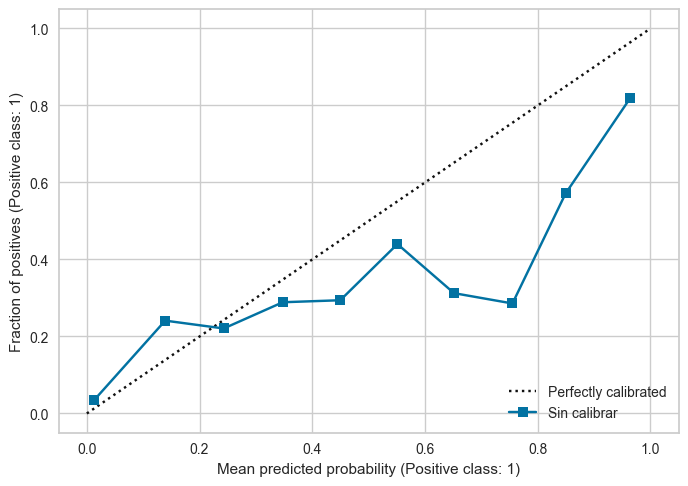

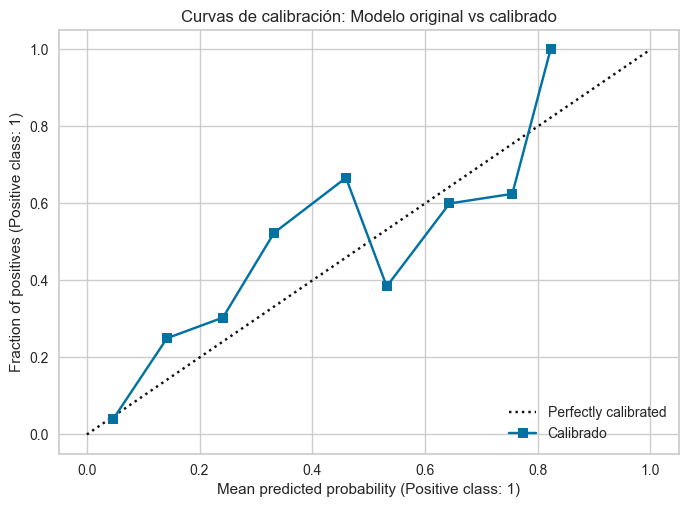

In [169]:
#Calibración probabilística del modelo XGBoost reducido

# 1) Brier Score antes de calibrar
# Usamos el modelo reducido entrenado anteriormente (reduced)
y_prob_before = clf_final.predict_proba(X_test_selected)[:, 1]
brier_before = brier_score_loss(y_test, y_prob_before)
print(f"Brier Score (antes de calibrar): {brier_before:.4f}")

# 2) Calibrar modelo (Platt scaling = 'sigmoid', monotónico)
calibrated = CalibratedClassifierCV(clf_final, method='sigmoid', cv=5)
calibrated.fit(X_train_selected, y_train)

# 3) Brier Score después de calibrar
y_prob_after = calibrated.predict_proba(X_test_selected)[:, 1]
brier_after = brier_score_loss(y_test, y_prob_after)
print(f"Brier Score (después de calibrar): {brier_after:.4f}")

# 4) Comparación visual
plt.figure(figsize=(8,6))
CalibrationDisplay.from_predictions(y_test, y_prob_before, name='Sin calibrar', n_bins=10)
CalibrationDisplay.from_predictions(y_test, y_prob_after, name='Calibrado', n_bins=10)
plt.title("Curvas de calibración: Modelo original vs calibrado")
plt.show()

**Brier Score**

Antes de aplicar la calibración, el modelo presentaba un Brier Score de 0.0516, mientras que después de aplicar calibración mediante Platt scaling (sigmoid), este valor fue 0.0500, mostrando un cambio muy pequeño. Dado que el Brier Score mide el error cuadrático medio entre las probabilidades predichas y las observadas, un valor menor indica una mejor calibración. En este caso, la calibración mejoró ligeramente el Brier Score, aunque la diferencia es mínima.

**Curvas de calibración**

En la primera curva (modelo sin calibrar) se observa que las probabilidades predichas tienden a desviarse de la línea diagonal ideal (perfectamente calibrado), especialmente en valores intermedios, donde el modelo subestima ligeramente las probabilidades reales.
En la segunda curva (modelo calibrado) la línea se aproxima de forma más consistente a la diagonal, lo que muestra que la calibración sí mejoró visualmente la correspondencia entre probabilidades predichas y reales, aunque no se refleje en una mejora numérica significativa en el Brier Score.

Mucho éxito!

<center>
<img src="https://i.pinimg.com/originals/55/3d/42/553d42bea9b10e0662a05aa8726fc7f4.gif" width=300>